In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import save_model

In [38]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [39]:
train_labels = []
train_samples = []

In [40]:
for i in range(50):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

5 percent of young experience side affects,95 percent of old experience side affects

In [41]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

the data must be represented in this numpy array form for keras to recognise it

In [42]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

this scaler converts the training data into a range between 0 and 1 as to normalize the training data,
this process reduces the possibility of any vanishing or exploding weights inside the model in training


In [43]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='sigmoid')
])


this model features 3 fulled connected layers using the relu activation function and softmax activation function

the relu activation function only passes positive values to the next nodes as the same value
sigmoid activation function maps positive values very close to 1 and negative close to 0

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

using the form of SGD of Adam, adaptive movement estimation. Adam uses a combination of two different sgd algorithms.
RMSprop and Momentum gradient descent optimization algorithms, the decaying average of past squared gradients
and past gradients is computed. This use of 'momentum' helps the algorithm determine the global minima.

the model is being optimised for the accuracy metric

this loss function computes the loss between true labels and predicted labels

In [45]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6787 - accuracy: 0.5159 - val_loss: 0.6669 - val_accuracy: 0.5524
Epoch 2/30
189/189 - 0s - loss: 0.6597 - accuracy: 0.5365 - val_loss: 0.6456 - val_accuracy: 0.6095
Epoch 3/30
189/189 - 0s - loss: 0.6404 - accuracy: 0.6021 - val_loss: 0.6248 - val_accuracy: 0.6429
Epoch 4/30
189/189 - 0s - loss: 0.6177 - accuracy: 0.6577 - val_loss: 0.6021 - val_accuracy: 0.6905
Epoch 5/30
189/189 - 0s - loss: 0.5954 - accuracy: 0.6921 - val_loss: 0.5797 - val_accuracy: 0.7000
Epoch 6/30
189/189 - 0s - loss: 0.5719 - accuracy: 0.7212 - val_loss: 0.5564 - val_accuracy: 0.7333
Epoch 7/30
189/189 - 0s - loss: 0.5473 - accuracy: 0.7481 - val_loss: 0.5324 - val_accuracy: 0.7571
Epoch 8/30
189/189 - 0s - loss: 0.5203 - accuracy: 0.7836 - val_loss: 0.5068 - val_accuracy: 0.8143
Epoch 9/30
189/189 - 0s - loss: 0.4928 - accuracy: 0.8111 - val_loss: 0.4818 - val_accuracy: 0.8333
Epoch 10/30
189/189 - 0s - loss: 0.4655 - accuracy: 0.8376 - val_loss: 0.4570 - val_accuracy: 0.8476

In [46]:
test_labels =  []
test_samples = []

for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

this test data is smaller in size than the training data and has been normalized in the same
way as the training data


In [47]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)
rounded_predictions = np.argmax(predictions, axis=-1)

cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [48]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[192  18]
 [  9 201]]


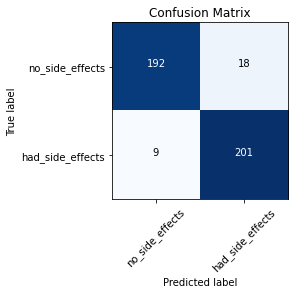

In [49]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
